In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [2]:
# path to dataframes
path_to_dfs = "suggestion_2/forecasted_counts/block_0304"

In [3]:
# os.listdir(path_to_dfs)

In [4]:
len(os.listdir(path_to_dfs))

6370

In [5]:
6370/910

7.0

In [6]:
# seems each sub-window sequence have 7 things stored - what are all these?

# the forecasted npy files
# ar_sigma
# noise_sigma
# betas
# rho
# averaged forecasts
# posterior parameter summaries - might need to pay a little attention here, the r_hat values are too high - think this should vary around 1? - but almost all the values are greater than 2.

In [7]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [8]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [9]:
# averaged_forecasts_csvs - we probably need these in order for getting the respective predicted values

In [10]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [11]:
# sorting them would not work as everything in the nomenclature of the files is a character - hence will not respect the numerical order

In [12]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [13]:
# ordered_csv_files

In [14]:
# averaged_forecasts_csvs list is pointless at this time?

In [15]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 1.51 s, sys: 318 ms, total: 1.83 s
Wall time: 21.8 s


In [16]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [17]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,0.0,-0.002703,0.0,-0.002829,0.0,-0.001001,0.00000,0.000151,0.098687,0.038012,...,0.0,-0.002718,0.0,-0.006755,0.0,-0.013232,0.0,-0.001351,0.0,-0.003482
1,0.0,0.002043,0.0,-0.001222,0.0,-0.000579,0.00000,0.002955,0.000280,0.063581,...,0.0,0.002387,0.0,-0.003777,0.0,-0.008729,0.0,0.004238,0.0,-0.007090
2,0.0,0.001082,0.0,-0.003555,0.0,-0.002347,0.00000,-0.000998,0.017957,0.052403,...,0.0,-0.002744,0.0,-0.003949,0.0,-0.009027,0.0,0.002270,0.0,-0.007150
3,0.0,0.000249,0.0,-0.000455,0.0,-0.001475,0.00000,0.001307,0.000000,0.045380,...,0.0,0.006040,0.0,-0.003619,0.0,-0.006382,0.0,0.006045,0.0,-0.003304
4,0.0,-0.005938,0.0,-0.001162,0.0,-0.002396,0.00025,-0.000782,0.052774,0.064758,...,0.0,0.002649,0.0,-0.002108,0.0,-0.002284,0.0,0.005317,0.0,-0.000558


In [18]:
combined_df.shape

(7, 1820)

In [19]:
# get the true values
True_values_df = combined_df[['True_value']]

In [20]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.00000,0.098687,0.439687,0.00000,0.0,0.0,0.0,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.00000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.00000,0.000280,0.191231,0.00028,0.0,0.0,0.0,...,0.000000e+00,0.000000,0.000000,2.406495e-01,0.41786,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.00000,0.017957,0.092096,0.00000,0.0,0.0,0.0,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.00000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,4.513563e-07,0.033814,0.001271,0.000000e+00,0.00000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.00025,0.052774,0.000018,0.00000,0.0,0.0,0.0,...,0.000000e+00,0.000020,0.002492,3.902047e-07,0.00000,0.0,0.0,0.0,0.0,0.0


In [21]:
True_values_df.shape

(7, 910)

In [22]:
# get the proper counts?
exp_true = np.exp(True_values_df)-1

In [23]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.000000e+00,0.103721,0.552221,0.00000,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000e+00,0.000280,0.210739,0.00028,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000,2.720751e-01,0.518708,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000e+00,0.018119,0.096470,0.00000,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,4.513564e-07,3.439246e-02,0.001272,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,2.504417e-04,0.054191,0.000018,0.00000,0.0,0.0,0.0,...,0.000000e+00,2.038446e-05,0.002495,3.902048e-07,0.000000,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,2.405033e-08,0.000154,0.000001,0.00000,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,0.000000e+00,8.526243e-09,0.000650,2.402814e-05,0.000000,0.0,0.0,0.0,0.0,0.0


In [24]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [25]:
sum_true_values

0    37.000000
1    41.002058
2    42.999998
3    41.999955
4    37.999999
5    34.000000
6    24.000000
dtype: float64

In [26]:
# get the forecasted values
Forecasted_values_df = combined_df[['Forecasted_value']]

In [27]:
Forecasted_values_df.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,-0.002703,-0.002829,-0.001001,0.000151,0.038012,0.114178,0.078607,0.010662,-0.009960,-0.008901,...,-0.012491,-0.000124,0.037431,0.005008,-0.006679,-0.002718,-0.006755,-0.013232,-0.001351,-0.003482
1,0.002043,-0.001222,-0.000579,0.002955,0.063581,0.211062,0.095184,0.006393,-0.001700,0.002683,...,-0.007742,-0.007971,0.043403,0.008399,-0.002738,0.002387,-0.003777,-0.008729,0.004238,-0.007090
2,0.001082,-0.003555,-0.002347,-0.000998,0.052403,0.250517,0.104517,0.012706,-0.004082,-0.001504,...,-0.005061,-0.009957,0.041978,0.013764,-0.003768,-0.002744,-0.003949,-0.009027,0.002270,-0.007150
3,0.000249,-0.000455,-0.001475,0.001307,0.045380,-0.040201,0.022880,0.003281,0.000004,0.008721,...,-0.001975,-0.011414,0.061573,0.006206,-0.000445,0.006040,-0.003619,-0.006382,0.006045,-0.003304
4,-0.005938,-0.001162,-0.002396,-0.000782,0.064758,-0.080362,-0.014952,0.006883,-0.004901,0.003172,...,0.004823,-0.005235,0.059769,0.000225,-0.003262,0.002649,-0.002108,-0.002284,0.005317,-0.000558


In [28]:
exp_forecasted = np.exp(Forecasted_values_df)-1

In [29]:
exp_forecasted

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,-0.002700,-0.002825,-0.001001,0.000151,0.038743,0.120951,0.081780,0.010719,-0.009911,-0.008861,...,-0.012414,-0.000124,0.038140,0.005021,-0.006656,-0.002715,-0.006732,-0.013145,-0.001350,-0.003476
1,0.002045,-0.001222,-0.000579,0.002959,0.065646,0.234989,0.099862,0.006413,-0.001698,0.002687,...,-0.007712,-0.007939,0.044359,0.008434,-0.002734,0.002390,-0.003769,-0.008691,0.004247,-0.007065
2,0.001083,-0.003548,-0.002344,-0.000998,0.053800,0.284689,0.110175,0.012787,-0.004074,-0.001503,...,-0.005049,-0.009908,0.042872,0.013859,-0.003761,-0.002741,-0.003941,-0.008986,0.002273,-0.007124
3,0.000249,-0.000455,-0.001474,0.001308,0.046425,-0.039404,0.023144,0.003287,0.000004,0.008759,...,-0.001973,-0.011349,0.063509,0.006225,-0.000445,0.006059,-0.003613,-0.006362,0.006063,-0.003299
4,-0.005921,-0.001161,-0.002393,-0.000782,0.066900,-0.077218,-0.014841,0.006906,-0.004889,0.003177,...,0.004834,-0.005221,0.061591,0.000225,-0.003256,0.002653,-0.002106,-0.002281,0.005331,-0.000557
5,0.002585,0.001494,-0.001930,0.000454,0.058246,0.014582,0.026901,0.008619,-0.000762,0.011528,...,0.001553,0.003473,0.059022,0.001169,0.000052,0.006640,-0.000712,0.001541,0.004112,0.001377
6,-0.000604,-0.000822,-0.001116,-0.001541,0.043001,-0.030615,0.040019,0.010147,0.000603,0.008168,...,0.000510,0.001464,0.051835,0.007930,0.001860,-0.000089,-0.001741,-0.001699,0.001312,0.001075


In [30]:
# set the values to 0 if the forecasted count is negative?

In [31]:
exp_forecasted[exp_forecasted < 0] = 0

In [32]:
exp_forecasted.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,0.000000,0.0,0.0,0.000151,0.038743,0.120951,0.081780,0.010719,0.000000,0.000000,...,0.000000,0.0,0.038140,0.005021,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.002045,0.0,0.0,0.002959,0.065646,0.234989,0.099862,0.006413,0.000000,0.002687,...,0.000000,0.0,0.044359,0.008434,0.0,0.002390,0.0,0.0,0.004247,0.0
2,0.001083,0.0,0.0,0.000000,0.053800,0.284689,0.110175,0.012787,0.000000,0.000000,...,0.000000,0.0,0.042872,0.013859,0.0,0.000000,0.0,0.0,0.002273,0.0
3,0.000249,0.0,0.0,0.001308,0.046425,0.000000,0.023144,0.003287,0.000004,0.008759,...,0.000000,0.0,0.063509,0.006225,0.0,0.006059,0.0,0.0,0.006063,0.0
4,0.000000,0.0,0.0,0.000000,0.066900,0.000000,0.000000,0.006906,0.000000,0.003177,...,0.004834,0.0,0.061591,0.000225,0.0,0.002653,0.0,0.0,0.005331,0.0


In [33]:
sum_forecasted_values = exp_forecasted.sum(axis = 1)

In [34]:
sum_forecasted_values

0    25.874716
1    27.898822
2    30.623143
3    22.870355
4    19.559255
5    25.754842
6    23.489284
dtype: float64

In [35]:
# concatenate the sum dataframes
block_0103_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [36]:
block_0103_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [37]:
block_0103_true_and_forecasted_values_df

,True_count,Forecasted_count
0,37.000000,25.874716
1,41.002058,27.898822
2,42.999998,30.623143
3,41.999955,22.870355
4,37.999999,19.559255
5,34.000000,25.754842
6,24.000000,23.489284


In [38]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

13.217409372908483

In [39]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

11.847370437118826

In [40]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=0.330767827057595, pvalue=0.46867789615953653)

In [41]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

-3.7766523608475415

##### Coverages and widths for the forecasted values?

In [42]:
# Should we get the interval preds in the same thinking way too?

In [43]:
# maybe we should - so first convert to data scale before avearging, and see if the measures differ a lot

In [44]:
# for this we need the all_forecasts npy files

In [45]:
# content location is the same path as above

In [46]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [47]:
# all_forecasts_npy_files

In [48]:
# load the npy files

In [49]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.exp(np.mean(load_file, axis = 1)) - 1
    loaded_npy_files.append(mean_file)

CPU times: user 855 ms, sys: 415 ms, total: 1.27 s
Wall time: 19 s


In [50]:
len(loaded_npy_files)

910

In [51]:
loaded_npy_files[0].shape

(1000, 7)

In [52]:
loaded_npy_files[0]

array([[-0.00152409,  0.00410604, -0.00354946, ..., -0.00527126,
         0.00447106,  0.00150657],
       [-0.00150007,  0.00426865, -0.00406092, ..., -0.0062781 ,
         0.00329876,  0.00182128],
       [-0.00125879,  0.00470161, -0.0046531 , ..., -0.00566536,
         0.00427186,  0.00242031],
       ...,
       [ 0.00347686,  0.00359344,  0.00576627, ..., -0.00516182,
         0.00760674,  0.00132239],
       [ 0.00333822,  0.0029192 ,  0.00618851, ..., -0.00492227,
         0.00704777,  0.00067258],
       [ 0.00468981,  0.00259519,  0.00719845, ..., -0.00515044,
         0.006235  ,  0.00219798]], dtype=float32)

In [53]:
%%time
# convert less than 0 entries to 0 for all arrays
for arr in loaded_npy_files:
    arr[arr < 0] = 0

CPU times: user 23.3 ms, sys: 193 µs, total: 23.5 ms
Wall time: 22.6 ms


In [54]:
loaded_npy_files[0]

array([[0.        , 0.00410604, 0.        , ..., 0.        , 0.00447106,
        0.00150657],
       [0.        , 0.00426865, 0.        , ..., 0.        , 0.00329876,
        0.00182128],
       [0.        , 0.00470161, 0.        , ..., 0.        , 0.00427186,
        0.00242031],
       ...,
       [0.00347686, 0.00359344, 0.00576627, ..., 0.        , 0.00760674,
        0.00132239],
       [0.00333822, 0.0029192 , 0.00618851, ..., 0.        , 0.00704777,
        0.00067258],
       [0.00468981, 0.00259519, 0.00719845, ..., 0.        , 0.006235  ,
        0.00219798]], dtype=float32)

In [55]:
# Since we do not have overlapping sub-windows, we can sum the counts to get the final densities
output = sum(loaded_npy_files)

In [56]:
output.shape

(1000, 7)

In [57]:
output

array([[32.38609 , 34.972416, 38.67072 , ..., 26.168747, 30.227236,
        28.230265],
       [26.085596, 30.014532, 31.130474, ..., 23.062975, 31.909464,
        30.277632],
       [32.405228, 31.872261, 35.69659 , ..., 25.442131, 31.798412,
        29.269054],
       ...,
       [33.234924, 32.481155, 37.986538, ..., 28.328905, 32.2973  ,
        35.38399 ],
       [26.15504 , 30.279364, 40.751373, ..., 32.900814, 31.498375,
        29.330124],
       [31.66064 , 35.7198  , 39.403473, ..., 33.840595, 35.61067 ,
        35.203037]], dtype=float32)

In [58]:
# is this sum correct? alternative method of computing the sums
output_alt = np.sum(loaded_npy_files, axis = 0)

In [59]:
output_alt.shape

(1000, 7)

In [60]:
output_alt

array([[32.38609 , 34.972416, 38.67072 , ..., 26.168747, 30.227236,
        28.230265],
       [26.085596, 30.014532, 31.130474, ..., 23.062975, 31.909464,
        30.277632],
       [32.405228, 31.872261, 35.69659 , ..., 25.442131, 31.798412,
        29.269054],
       ...,
       [33.234924, 32.481155, 37.986538, ..., 28.328905, 32.2973  ,
        35.38399 ],
       [26.15504 , 30.279364, 40.751373, ..., 32.900814, 31.498375,
        29.330124],
       [31.66064 , 35.7198  , 39.403473, ..., 33.840595, 35.61067 ,
        35.203037]], dtype=float32)

In [61]:
np.mean(output_alt == output)

1.0

In [62]:
# verified the sum is correct, let's get the widths and the coverages - and also any essential plots

In [63]:
# now we can get the 2.5th abd the 97.5th percentiles - to get the coverage and the widths of the CIS
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [64]:
li_train

array([[23.06216927],
       [23.33740983],
       [24.64093947],
       [20.40495868],
       [18.09996319],
       [22.11175604],
       [21.08130112]])

In [65]:
ui_train

array([[41.15787201],
       [43.33403368],
       [46.06419487],
       [42.80896559],
       [37.41666212],
       [44.19714022],
       [43.53943586]])

In [66]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [67]:
avg_width_train

20.825686679567607

In [68]:
y_traina = block_0103_true_and_forecasted_values_df[["True_count"]].values

In [69]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [70]:
coverage_train

0.8571428571428571

In [71]:
np.mean(output, axis = 0)

array([31.351305, 32.629185, 35.039112, 30.100151, 26.894884, 31.85174 ,
       30.803896], dtype=float32)

In [72]:
# sum_forecasted_values

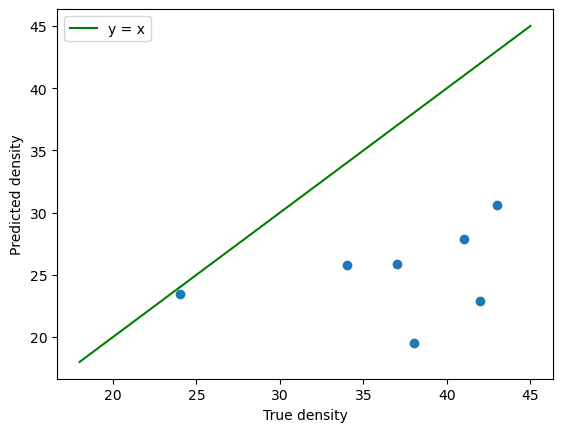

In [76]:
plt.scatter(block_0103_true_and_forecasted_values_df['True_count'], block_0103_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([18, 45], [18, 45], color='green', label='y = x')
plt.legend()
plt.show()

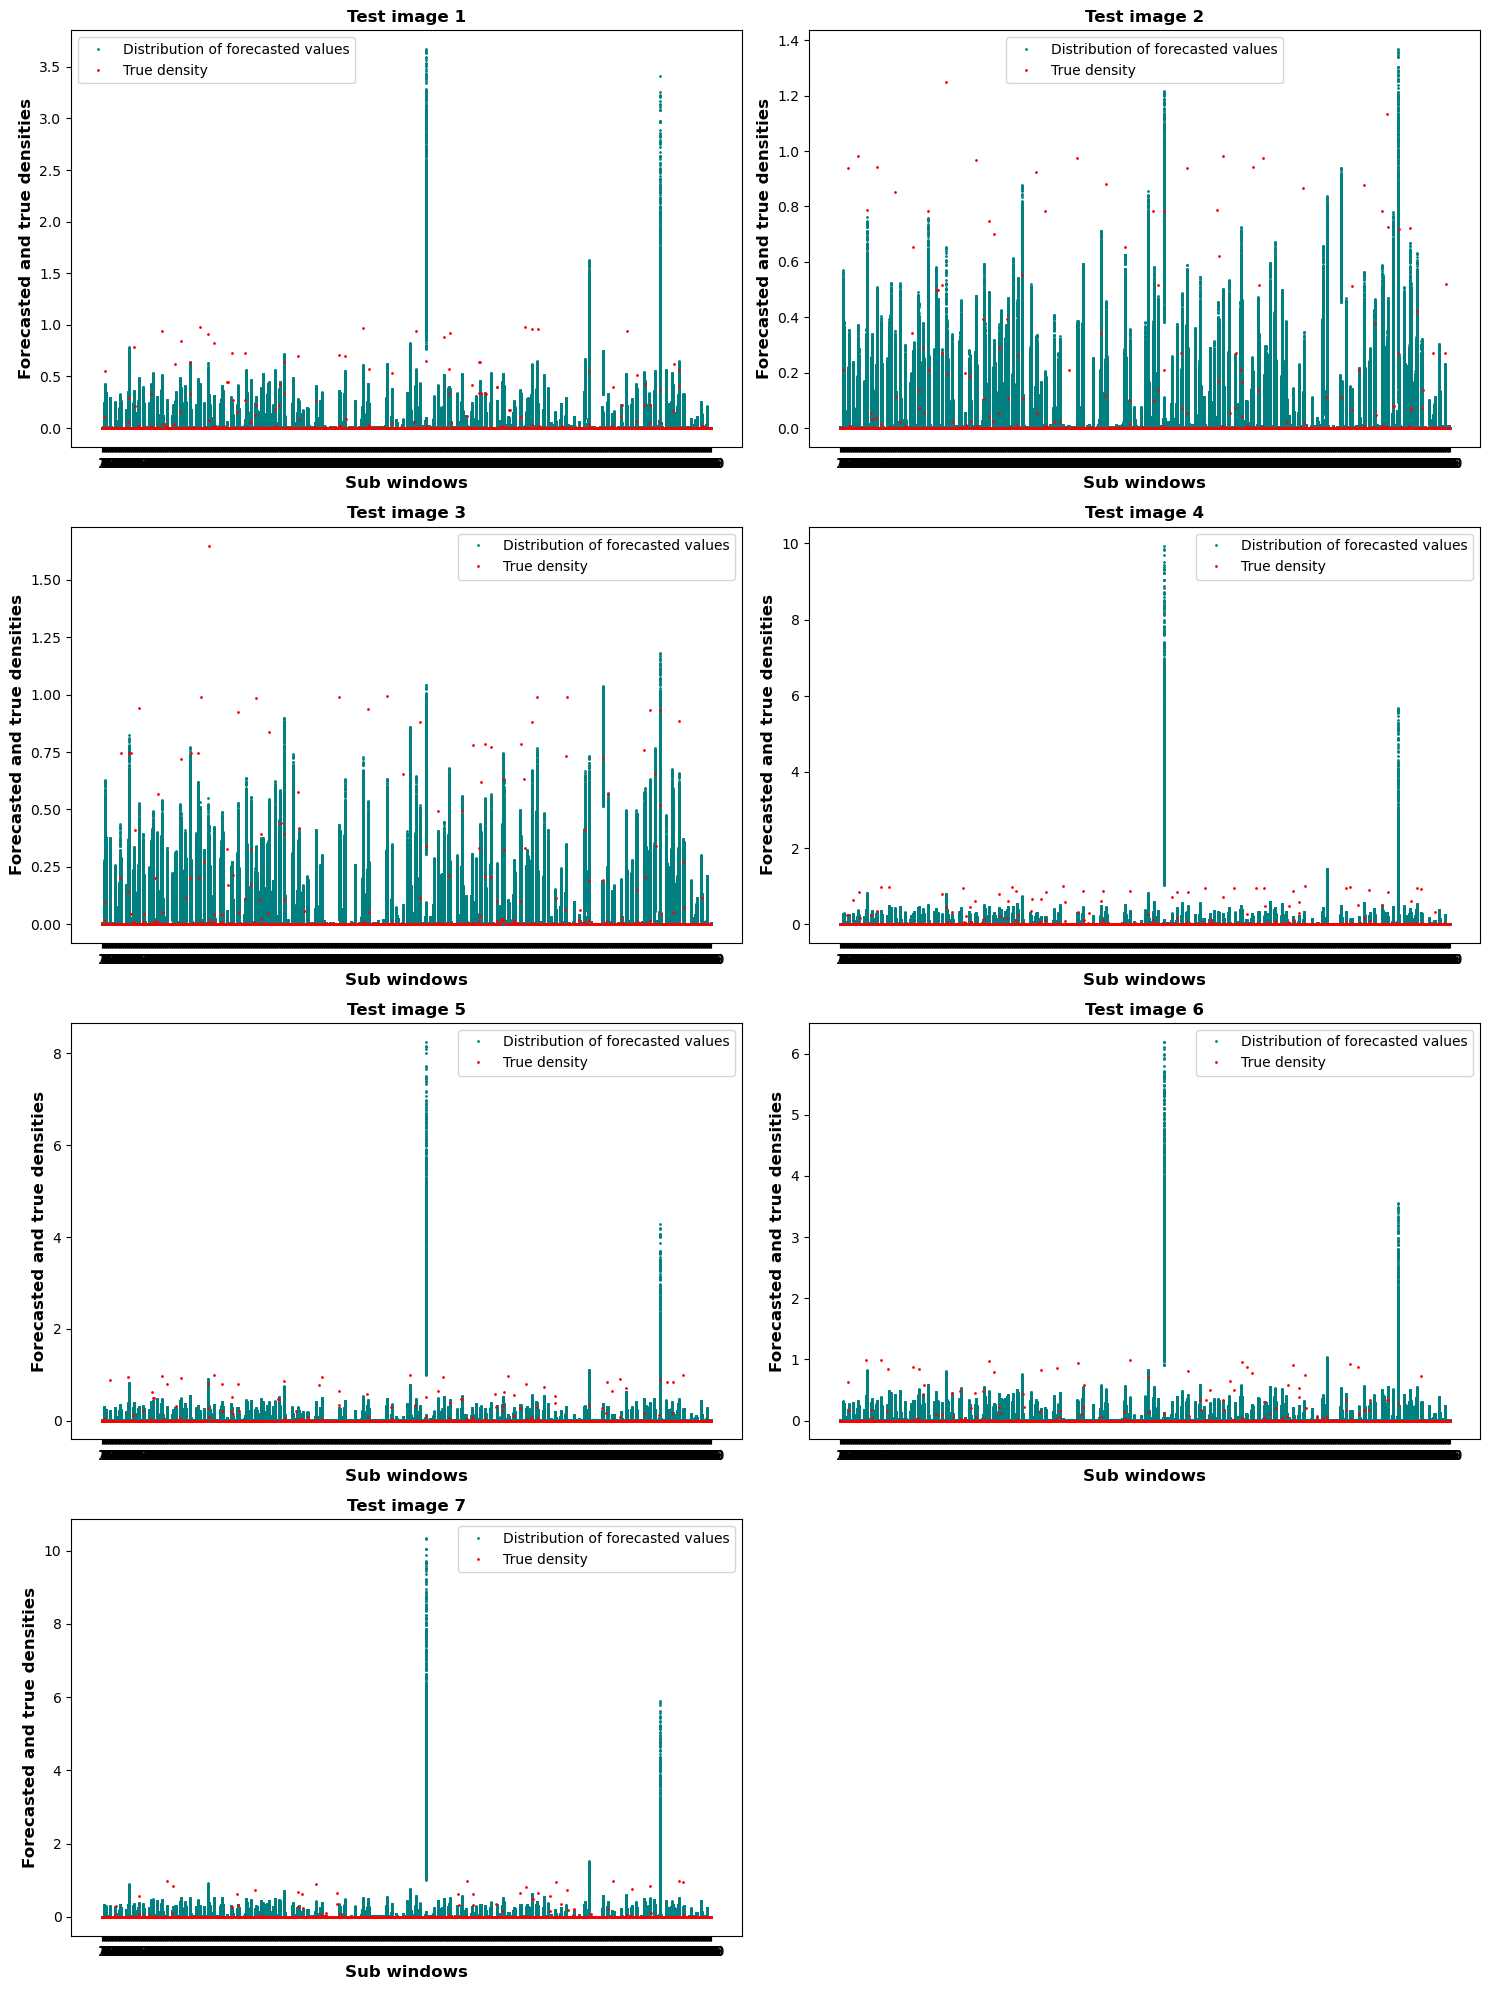

CPU times: user 29.1 s, sys: 757 ms, total: 29.9 s
Wall time: 29.5 s


In [74]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(15,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for y, file in enumerate(loaded_npy_files):
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    sorted_stacked_forecasts = np.sort(stacked_forecasts, axis = 1)
    # get the values between the 2.5th and 97.5th percentile?
    sorted_interval_data = sorted_stacked_forecasts[:,25:975]

    # Plot for the current 2D array
    for l, row in enumerate(sorted_interval_data):
        axes[i].plot([l + 1] * len(row), row, 'o', markersize=1, color='teal', label='Distribution of forecasted values' if l == 0 else "")
    
    true_counts = exp_true.iloc[i,:].values

    # # Overlay the 1D array values
    axes[i].plot(np.arange(1, 911), true_counts, 'o', markersize=1, color='red', label='True density')
    
    # Customize x-ticks and labels
    axes[i].set_xticks(np.arange(1, 911))
    # axes[i].set_xticklabels([f'sub_window_{zz + 1}' for zz in range(910)], rotation=90, fontsize=13)
    axes[i].set_xlabel("Sub windows", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Forecasted and true densities", fontsize=12, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')
    axes[i].legend()


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# # Save the figure as a PDF file
# plt.savefig("Previous_data/Forecasted_distributions_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [75]:
# plots are going to be too over-crowded as we now have 910 subwindows - might beed to talk to Dr. Ghosh to figure out a better way to give these plots